In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
da = pd.read_csv("nhanes_2015_2016.csv")

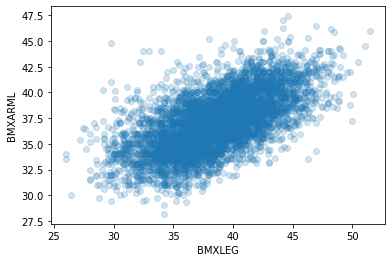

In [3]:
sns.regplot(data=da, x="BMXLEG", y='BMXARML', fit_reg=False, scatter_kws={"alpha": 0.2});

<AxesSubplot:xlabel='BMXLEG', ylabel='BMXARML'>

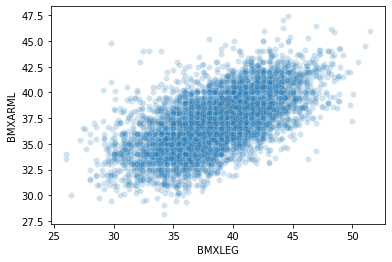

In [4]:
# Cell added by Kristin
# You may use scatterplot. It also has alpha parameter.
sns.scatterplot(data=da, x="BMXLEG", y='BMXARML', alpha=0.2)

In [5]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: 'Male', 2: 'Female'}) 

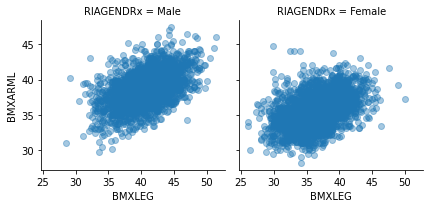

In [6]:
g = sns.FacetGrid(da, col='RIAGENDRx')
g = g.map(plt.scatter, "BMXLEG", 'BMXARML' , alpha=0.4)
g = g.add_legend()
plt.show()

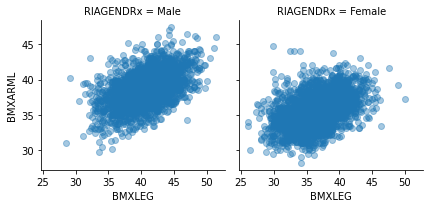

In [7]:
sns.FacetGrid(da, col="RIAGENDRx").map(plt.scatter, "BMXLEG", "BMXARML", alpha=0.4).add_legend()
#sns.FacetGrid(da, col='RIAGENDRx').map(plt.scatter, "BMXLEG", "BMXARML", alpha=0.4).add_legend()

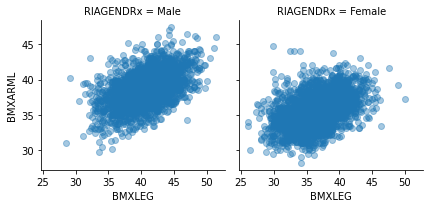

In [8]:
sns.FacetGrid(da, col='RIAGENDRx').map(plt.scatter, "BMXLEG", "BMXARML", alpha=0.4).add_legend()

In [9]:
da.loc[da.RIAGENDRx=='Female', ["BMXLEG", "BMXARML"]].dropna().corr()

,BMXLEG,BMXARML
BMXLEG,1.000000,0.434703
BMXARML,0.434703,1.000000


In [10]:
da.loc[da["RIAGENDRx"]=='Male', ["BMXLEG", "BMXARML"]].dropna().corr()

,BMXLEG,BMXARML
BMXLEG,1.000000,0.505426
BMXARML,0.505426,1.000000


In [11]:
da.loc[da["RIAGENDRx"]=='Male', ["BMXLEG", "BMXARML"]].dropna().corr()

,BMXLEG,BMXARML
BMXLEG,1.000000,0.505426
BMXARML,0.505426,1.000000


In [12]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})


In [13]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College",
                                       7: "Refused", 9: "Don't know"})

In [14]:
da.head(1)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,RIAGENDRx,DMDEDUC2x,DMDMARTLx
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Male,College,Married


In [15]:
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})

In [16]:
da.DMDMARTLx.value_counts()

Married             2780
Never married       1004
Divorced             579
Living w/partner     527
Widowed              396
Separated            186
Refused                2
Name: DMDMARTLx, dtype: int64

In [17]:
da.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [18]:
da.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

In [19]:
da.DMDMARTL.value_counts()

1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: DMDMARTL, dtype: int64

In [20]:
da.DMDMARTLx.value_counts()

Married             2780
Never married       1004
Divorced             579
Living w/partner     527
Widowed              396
Separated            186
Refused                2
Name: DMDMARTLx, dtype: int64

In [21]:
db = da.loc[(da.DMDEDUC2x != "Don't know") & (da.DMDMARTLx != "Refused"), :]

In [22]:
db = da.loc[(da.DMDEDUC2x != "Don't Know") & (da.DMDMARTLx != "Refused"), :]

In [23]:
db.head(1)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,RIAGENDRx,DMDEDUC2x,DMDMARTLx
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Male,College,Married


In [30]:
x = pd.crosstab(db.DMDEDUC2x, db.DMDMARTLx)
x

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,62,80,305,117,39,40
<9,52,66,341,65,43,88
College,120,85,827,253,22,59
Don't know,1,0,0,0,0,2
HS/GED,127,133,550,237,40,99
Some college/AA,217,163,757,332,42,108


In [36]:
x = pd.crosstab(db.DMDEDUC2x, da.DMDMARTLx)
x

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,62,80,305,117,39,40
<9,52,66,341,65,43,88
College,120,85,827,253,22,59
Don't know,1,0,0,0,0,2
HS/GED,127,133,550,237,40,99
Some college/AA,217,163,757,332,42,108


In [38]:
x.apply(lambda z: z/z.sum(), axis=1)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.096423,0.124417,0.474339,0.181960,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.099237,0.065649,0.134351
College,0.087848,0.062225,0.605417,0.185212,0.016105,0.043192
Don't know,0.333333,0.000000,0.000000,0.000000,0.000000,0.666667
HS/GED,0.107083,0.112142,0.463744,0.199831,0.033727,0.083474
Some college/AA,0.134033,0.100679,0.467573,0.205065,0.025942,0.066708


In [39]:
x.apply(lambda z: z/z.sum(), axis=0)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.107081,0.151803,0.109712,0.116534,0.209677,0.101010
<9,0.089810,0.125237,0.122662,0.064741,0.231183,0.222222
College,0.207254,0.161290,0.297482,0.251992,0.118280,0.148990
Don't know,0.001727,0.000000,0.000000,0.000000,0.000000,0.005051
HS/GED,0.219344,0.252372,0.197842,0.236056,0.215054,0.250000
Some college/AA,0.374784,0.309298,0.272302,0.330677,0.225806,0.272727


In [ ]:
db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

In [46]:
db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size()

RIAGENDRx  DMDEDUC2x        DMDMARTLx       
Female     9-11             Divorced             33
                            Living w/partner     36
                            Married             120
                            Never married        50
                            Separated            22
                                               ... 
Male       Some college/AA  Living w/partner     73
                            Married             377
                            Never married       141
                            Separated            13
                            Widowed              25
Length: 63, dtype: int64

In [47]:
db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack()

DMDMARTLx                  Divorced  Living w/partner  Married  Never married  \
RIAGENDRx DMDEDUC2x                                                             
Female    9-11                 33.0              36.0    120.0           50.0   
          <9                   32.0              32.0    148.0           38.0   
          College              79.0              40.0    414.0          131.0   
          Don't know            NaN               NaN      NaN            NaN   
          HS/GED               71.0              64.0    241.0          110.0   
          Some college/AA     135.0              90.0    380.0          191.0   
Male      9-11                 29.0              44.0    185.0           67.0   
          <9                   20.0              34.0    193.0           27.0   
          College              41.0              45.0    413.0          122.0   
          Don't know            1.0               NaN      NaN            NaN   
          HS/GED               56.0              69.0    309.0          127.0   
          Some college/AA      82.0              73.0    377.0          141.0   

DMDMARTLx                  Separated  Widowed  
RIAGENDRx DMDEDUC2x                            
Female    9-11                  22.0     30.0  
          <9                    31.0     68.0  
          College               12.0     41.0  
          Don't know             NaN      1.0  
          HS/GED                24.0     73.0  
          Some college/AA       29.0     83.0  
Male      9-11                  17.0     10.0  
          <9                    12.0     20.0  
          College               10.0     18.0  
          Don't know             NaN      1.0  
          HS/GED                16.0     26.0  
          Some college/AA       13.0     25.0

In [48]:
db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda z: z/z.sum(), axis=1)

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.113402          0.123711  0.412371   
          <9               0.091691          0.091691  0.424069   
          College          0.110181          0.055788  0.577406   
          Don't know       0.000000          0.000000  0.000000   
          HS/GED           0.121784          0.109777  0.413379   
          Some college/AA  0.148678          0.099119  0.418502   
Male      9-11             0.082386          0.125000  0.525568   
          <9               0.065359          0.111111  0.630719   
          College          0.063174          0.069337  0.636364   
          Don't know       0.500000          0.000000  0.000000   
          HS/GED           0.092869          0.114428  0.512438   
          Some college/AA  0.115331          0.102672  0.530239   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.171821   0.075601  0.103093  
          <9                    0.108883   0.088825  0.194842  
          College               0.182706   0.016736  0.057183  
          Don't know            0.000000   0.000000  1.000000  
          HS/GED                0.188679   0.041166  0.125214  
          Some college/AA       0.210352   0.031938  0.091410  
Male      9-11                  0.190341   0.048295  0.028409  
          <9                    0.088235   0.039216  0.065359  
          College               0.187982   0.015408  0.027735  
          Don't know            0.000000   0.000000  0.500000  
          HS/GED                0.210614   0.026534  0.043118  
          Some college/AA       0.198312   0.018284  0.035162

In [49]:
db.groupby(["RIAGENDRx", "DMDEDUC2x"])["DMDMARTLx"].value_counts()

RIAGENDRx  DMDEDUC2x        DMDMARTLx       
Female     9-11             Married             120
                            Never married        50
                            Living w/partner     36
                            Divorced             33
                            Widowed              30
                                               ... 
Male       Some college/AA  Never married       141
                            Divorced             82
                            Living w/partner     73
                            Widowed              25
                            Separated            13
Name: DMDMARTLx, Length: 63, dtype: int64

In [52]:
db.groupby(["RIAGENDRx", "DMDEDUC2x"])["DMDMARTLx"].value_counts().unstack().fillna(0).apply(lambda z:z/z.sum(), axis=1)

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.113402          0.123711  0.412371   
          <9               0.091691          0.091691  0.424069   
          College          0.110181          0.055788  0.577406   
          Don't know       0.000000          0.000000  0.000000   
          HS/GED           0.121784          0.109777  0.413379   
          Some college/AA  0.148678          0.099119  0.418502   
Male      9-11             0.082386          0.125000  0.525568   
          <9               0.065359          0.111111  0.630719   
          College          0.063174          0.069337  0.636364   
          Don't know       0.500000          0.000000  0.000000   
          HS/GED           0.092869          0.114428  0.512438   
          Some college/AA  0.115331          0.102672  0.530239   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.171821   0.075601  0.103093  
          <9                    0.108883   0.088825  0.194842  
          College               0.182706   0.016736  0.057183  
          Don't know            0.000000   0.000000  1.000000  
          HS/GED                0.188679   0.041166  0.125214  
          Some college/AA       0.210352   0.031938  0.091410  
Male      9-11                  0.190341   0.048295  0.028409  
          <9                    0.088235   0.039216  0.065359  
          College               0.187982   0.015408  0.027735  
          Don't know            0.000000   0.000000  0.500000  
          HS/GED                0.210614   0.026534  0.043118  
          Some college/AA       0.198312   0.018284  0.035162

In [56]:
da.loc[da.RIAGENDRx=="Female", ["BMXLEG", "BMXARML"]].dropna().corr()

,BMXLEG,BMXARML
BMXLEG,1.000000,0.434703
BMXARML,0.434703,1.000000


In [57]:
my_data = [[1, "20-30", "F", "level_1", 70],[2, "30-40", "F", "level_2", 80],[3, "30-40", "M", "level_3", 95],[4, "20-30", "M", "level_3", 93]]
my_df = pd.DataFrame(data=my_data, columns=["ID", "Agegrp", "Gender", "EduLevel", 'Score'])
my_df

,ID,Agegrp,Gender,EduLevel,Score
0,1,20-30,F,level_1,70
1,2,30-40,F,level_2,80
2,3,30-40,M,level_3,95
3,4,20-30,M,level_3,93


TypeError: 'numpy.int32' object is not callable

In [59]:
g = db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"])

In [60]:
type(g)

pandas.core.groupby.generic.DataFrameGroupBy

In [61]:
db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).count()

SEQN  ALQ101  ALQ110  ALQ130  \
RIAGENDRx DMDEDUC2x       DMDMARTLx                                        
Female    9-11            Divorced            33      30      15      10   
                          Living w/partner    36      32      16      14   
                          Married            120     111      65      44   
                          Never married       50      44      23      24   
                          Separated           22      20      11      11   
...                                          ...     ...     ...     ...   
Male      Some college/AA Living w/partner    73      71      12      60   
                          Married            377     349      67     255   
                          Never married      141     129      28      99   
                          Separated           13      13       1      10   
                          Widowed             25      23       5      12   

                                            SMQ020  RIAGENDR  RIDAGEYR  \
RIAGENDRx DMDEDUC2x       DMDMARTLx                                      
Female    9-11            Divorced              33        33        33   
                          Living w/partner      36        36        36   
                          Married              120       120       120   
                          Never married         50        50        50   
                          Separated             22        22        22   
...                                            ...       ...       ...   
Male      Some college/AA Living w/partner      73        73        73   
                          Married              377       377       377   
                          Never married        141       141       141   
                          Separated             13        13        13   
                          Widowed               25        25        25   

                                            RIDRETH1  DMDCITZN  DMDEDUC2  ...  \
RIAGENDRx DMDEDUC2x       DMDMARTLx                                       ...   
Female    9-11            Divorced                33        33        33  ...   
                          Living w/partner        36        35        36  ...   
                          Married                120       120       120  ...   
                          Never married           50        50        50  ...   
                          Separated               22        22        22  ...   
...                                              ...       ...       ...  ...   
Male      Some college/AA Living w/partner        73        73        73  ...   
                          Married                377       377       377  ...   
                          Never married          141       141       141  ...   
                          Separated               13        13        13  ...   
                          Widowed                 25        25        25  ...   

                                            BPXSY2  BPXDI2  BMXWT  BMXHT  \
RIAGENDRx DMDEDUC2x       DMDMARTLx                                        
Female    9-11            Divorced              31      31     33     33   
                          Living w/partner      33      33     36     36   
                          Married              117     117    120    120   
                          Never married         50      50     50     50   
                          Separated             20      20     22     22   
...                                            ...     ...    ...    ...   
Male      Some college/AA Living w/partner      69      69     73     73   
                          Married              374     374    373    374   
                          Never married        133     133    138    138   
                          Separated             13      13     13     13   
                          Widowed               25      25     25     25   

                                            BMXBM

In [62]:
db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size()

RIAGENDRx  DMDEDUC2x        DMDMARTLx       
Female     9-11             Divorced             33
                            Living w/partner     36
                            Married             120
                            Never married        50
                            Separated            22
                                               ... 
Male       Some college/AA  Living w/partner     73
                            Married             377
                            Never married       141
                            Separated            13
                            Widowed              25
Length: 63, dtype: int64

In [63]:
db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).count()

SEQN  ALQ101  ALQ110  ALQ130  \
RIAGENDRx DMDEDUC2x       DMDMARTLx                                        
Female    9-11            Divorced            33      30      15      10   
                          Living w/partner    36      32      16      14   
                          Married            120     111      65      44   
                          Never married       50      44      23      24   
                          Separated           22      20      11      11   
...                                          ...     ...     ...     ...   
Male      Some college/AA Living w/partner    73      71      12      60   
                          Married            377     349      67     255   
                          Never married      141     129      28      99   
                          Separated           13      13       1      10   
                          Widowed             25      23       5      12   

                                            SMQ020  RIAGENDR  RIDAGEYR  \
RIAGENDRx DMDEDUC2x       DMDMARTLx                                      
Female    9-11            Divorced              33        33        33   
                          Living w/partner      36        36        36   
                          Married              120       120       120   
                          Never married         50        50        50   
                          Separated             22        22        22   
...                                            ...       ...       ...   
Male      Some college/AA Living w/partner      73        73        73   
                          Married              377       377       377   
                          Never married        141       141       141   
                          Separated             13        13        13   
                          Widowed               25        25        25   

                                            RIDRETH1  DMDCITZN  DMDEDUC2  ...  \
RIAGENDRx DMDEDUC2x       DMDMARTLx                                       ...   
Female    9-11            Divorced                33        33        33  ...   
                          Living w/partner        36        35        36  ...   
                          Married                120       120       120  ...   
                          Never married           50        50        50  ...   
                          Separated               22        22        22  ...   
...                                              ...       ...       ...  ...   
Male      Some college/AA Living w/partner        73        73        73  ...   
                          Married                377       377       377  ...   
                          Never married          141       141       141  ...   
                          Separated               13        13        13  ...   
                          Widowed                 25        25        25  ...   

                                            BPXSY2  BPXDI2  BMXWT  BMXHT  \
RIAGENDRx DMDEDUC2x       DMDMARTLx                                        
Female    9-11            Divorced              31      31     33     33   
                          Living w/partner      33      33     36     36   
                          Married              117     117    120    120   
                          Never married         50      50     50     50   
                          Separated             20      20     22     22   
...                                            ...     ...    ...    ...   
Male      Some college/AA Living w/partner      69      69     73     73   
                          Married              374     374    373    374   
                          Never married        133     133    138    138   
                          Separated             13      13     13     13   
                          Widowed               25      25     25     25   

                                            BMXBM